# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
data = pd.read_csv('/content/Electric_Production.csv')
data.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


# Data Exploration

In [10]:
type(data['DATE'])

pandas.core.series.Series

In [11]:
data['DATE']

,DATE
0,1/1/1985
1,2/1/1985
2,3/1/1985
3,4/1/1985
4,5/1/1985
...,...
392,9/1/2017
393,10/1/2017
394,11/1/2017
395,12/1/2017


In [12]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [13]:
data['DATE']

,DATE
0,1985-01-01
1,1985-02-01
2,1985-03-01
3,1985-04-01
4,1985-05-01
...,...
392,2017-09-01
393,2017-10-01
394,2017-11-01
395,2017-12-01


In [14]:
data.set_index('DATE', inplace=True)


In [15]:
data.rename(columns={'IPG2211A2N':'Production'}, inplace=True)

In [16]:
data.head()

,Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


# Visualizing the Raw Data

Text(0, 0.5, 'Gigawatts (GW)')

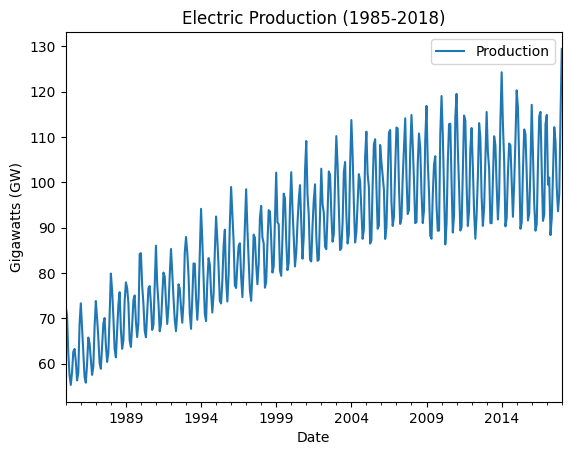

In [17]:
data.plot(title='Electric Production (1985-2018)')
plt.xlabel('Date')
plt.ylabel('Gigawatts (GW)')

# Rolling window

<Axes: xlabel='DATE'>

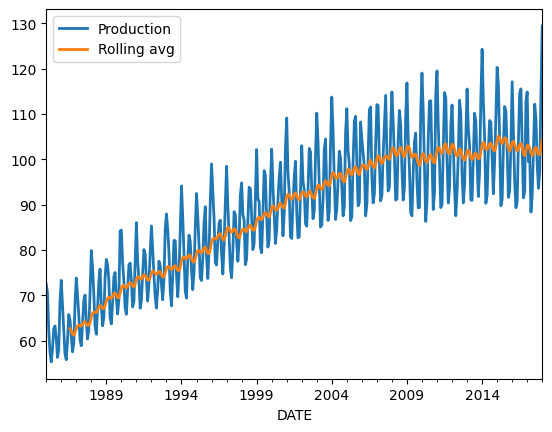

In [18]:

rolling_prod = data['Production'].rolling(window=20).mean()
data['Rolling avg'] = rolling_prod
data.plot(linewidth=2)

# ARIMA - Auto Regressive Integrated Moving average
Data forecasting

In [32]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 32.5 MB/s eta 0:00:00


In [33]:
from pmdarima import auto_arima

In [34]:
stepwise_fit = auto_arima(data['Production'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

# ARIMA has parameters p,d,q
#auto_arima tries different combinations of p,d,q to minimize AIC...outputs best model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.53 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2449.577, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2431.710, Time=0.77 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2431.461, Time=0.49 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2359.635, Time=0.81 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1021.370
Date:                Sat, 03 Jan 2026   AIC                           2058.740
Time:                        04:41:32   BIC                           2090.591
Sample:                    01-01-1985   HQIC                          2071.359
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1108      0.024      4.712      0.000       0.065       0.157
ar.L1          0.9986      0.002    507.930      0.000       0.995       1.002
ar.L2         -0.9993      0.001   -754.397      0.000      -1.002      -0.997
ma.L1         -1.3641      0.038    -35.679      0.000      -1.439      -1.289
ma.L2          0.9232      0.071     12.938      0.000       0.783       1.063
ma.L3          0.0064      0.071      0.089      0.929      -0.134       0.146
ma.L4         -0.4329      0.042    -10.251      0.000      -0.516      -0.350
sigma2         9.8840      0.634     15.588      0.000       8.641      11.127
===================================================================================
Ljung-Box (L1) (Q):                   1.03   Jarque-Bera (JB):                22.00
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
from statsmodels.tsa.arima.model import ARIMA

# Split Data into Training and Testing

In [41]:
print(data.shape)
train = data.iloc[:-30]
test = data.iloc[-30:]


(397, 2)


In [42]:
model = ARIMA(train['Production'], order=(2,1,4)) #specifying order that i want
model = model.fit()
model.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                  367
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -936.058
Date:                Sat, 03 Jan 2026   AIC                           1886.116
Time:                        04:46:29   BIC                           1913.434
Sample:                    01-01-1985   HQIC                          1896.971
                         - 07-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9978      0.003    345.640      0.000       0.992       1.003
ar.L2         -0.9989      0.002   -513.836      0.000      -1.003      -0.995
ma.L1         -1.2949      0.045    -28.589      0.000      -1.384      -1.206
ma.L2          0.9010      0.085     10.637      0.000       0.735       1.067
ma.L3          0.0216      0.088      0.246      0.806      -0.150       0.194
ma.L4         -0.3913      0.055     -7.100      0.000      -0.499      -0.283
sigma2         9.5464      0.640     14.909      0.000       8.291      10.801
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                18.84
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Make Predictions on Test Set

In [43]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)

2015-08-01    109.915142
2015-09-01     99.200833
2015-10-01     91.445498
2015-11-01     94.929375
2015-12-01    106.152311
2016-01-01    113.870776
2016-02-01    110.362016
2016-03-01     99.151080
2016-04-01     91.469444
2016-05-01     95.002966
2016-06-01    106.201822
2016-07-01    113.846671
2016-08-01    110.288508
2016-09-01     99.101810
2016-10-01     91.493707
2016-11-01     95.076391
2016-12-01    106.250851
2017-01-01    113.822250
2017-02-01    110.215166
2017-03-01     99.053022
2017-04-01     91.518285
2017-05-01     95.149649
2017-06-01    106.299398
2017-07-01    113.797515
2017-08-01    110.141992
2017-09-01     99.004715
2017-10-01     91.543176
2017-11-01     95.222738
2017-12-01    106.347465
2018-01-01    113.772470
Freq: MS, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='DATE'>

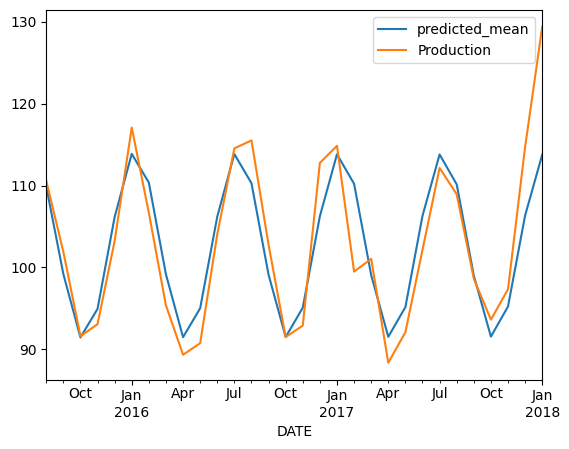

In [47]:
pred.plot(legend=True)
test['Production'].plot(legend=True)


Evaluate model RMSE

In [53]:
test['Production'].mean()

np.float64(102.87691)

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['Production']))
print(rmse) # Model is good. Comparing to mean of whole dataset


4.685161089525822


Creating new ARIMA model to forecast data

In [54]:
model2 = ARIMA(data['Production'], order=(2,1,4))
model2 = model2.fit()
data.tail()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Production,Rolling avg
DATE,,
2017-09-01,98.6154,101.687805
2017-10-01,93.6137,101.035050
2017-11-01,97.3359,101.134105
2017-12-01,114.7212,102.403895
2018-01-01,129.4048,104.337290


For Future Dates

In [67]:
future_dates = pd.date_range(start='2018-01-02', end='2018-01-22')
pred = model2.predict(start=len(data), end=len(data) + 20, typ='levels').rename('ARIMA Predictions')
pred.head()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,ARIMA Predictions
2018-02-01,119.375218
2018-03-01,103.260634
2018-04-01,94.356892
2018-05-01,97.685435
2018-06-01,109.907792


<Axes: >

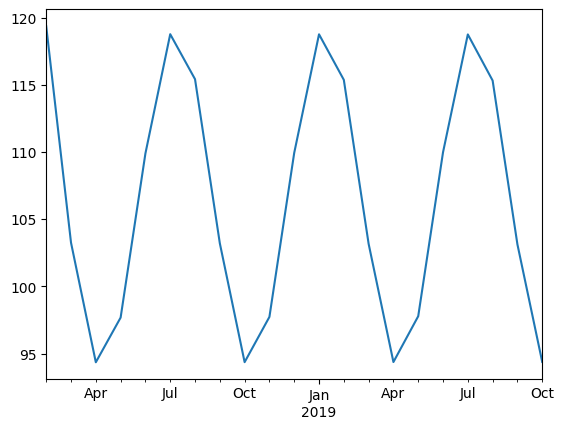

In [68]:
pred.plot()

<Axes: >

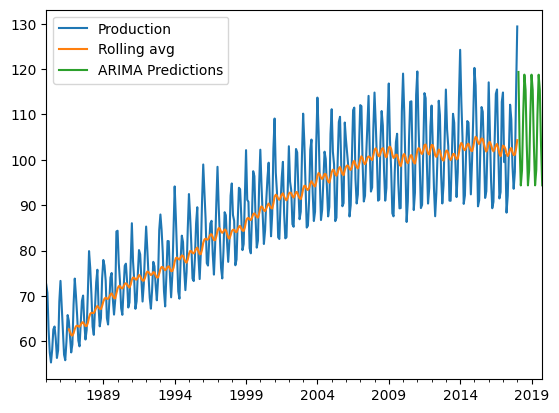

In [69]:
df_with_preds = pd.concat([data, pred])
df_with_preds.plot()

# Volatility Visualization

In [20]:
# If we had data for all days of the month, and we just wanted one per week + you want to calculate mean for that week:
# df.resample('W').mean()
rolling_prod.idxmax() #index of max value


Timestamp('2015-02-01 00:00:00')

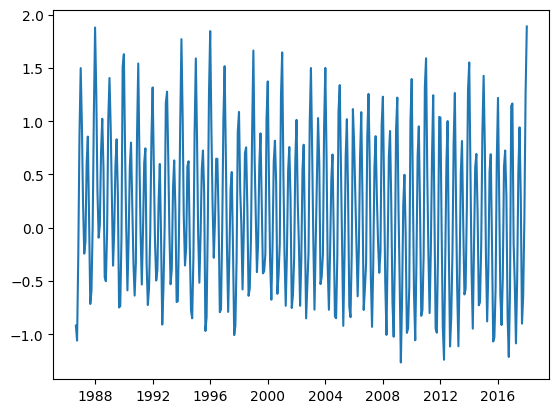

In [23]:
a = rolling_prod.pct_change()* 100 #percentage change (volatility)
plt.plot(a)

In [24]:
data.corr()

,Production,Rolling avg
Production,1.000000,0.856136
Rolling avg,0.856136,1.000000


# Plotting first order differencing
Visualizing monthly changes

,Production,Rolling avg
Production,1.000000,0.756297
Rolling avg,0.756297,1.000000


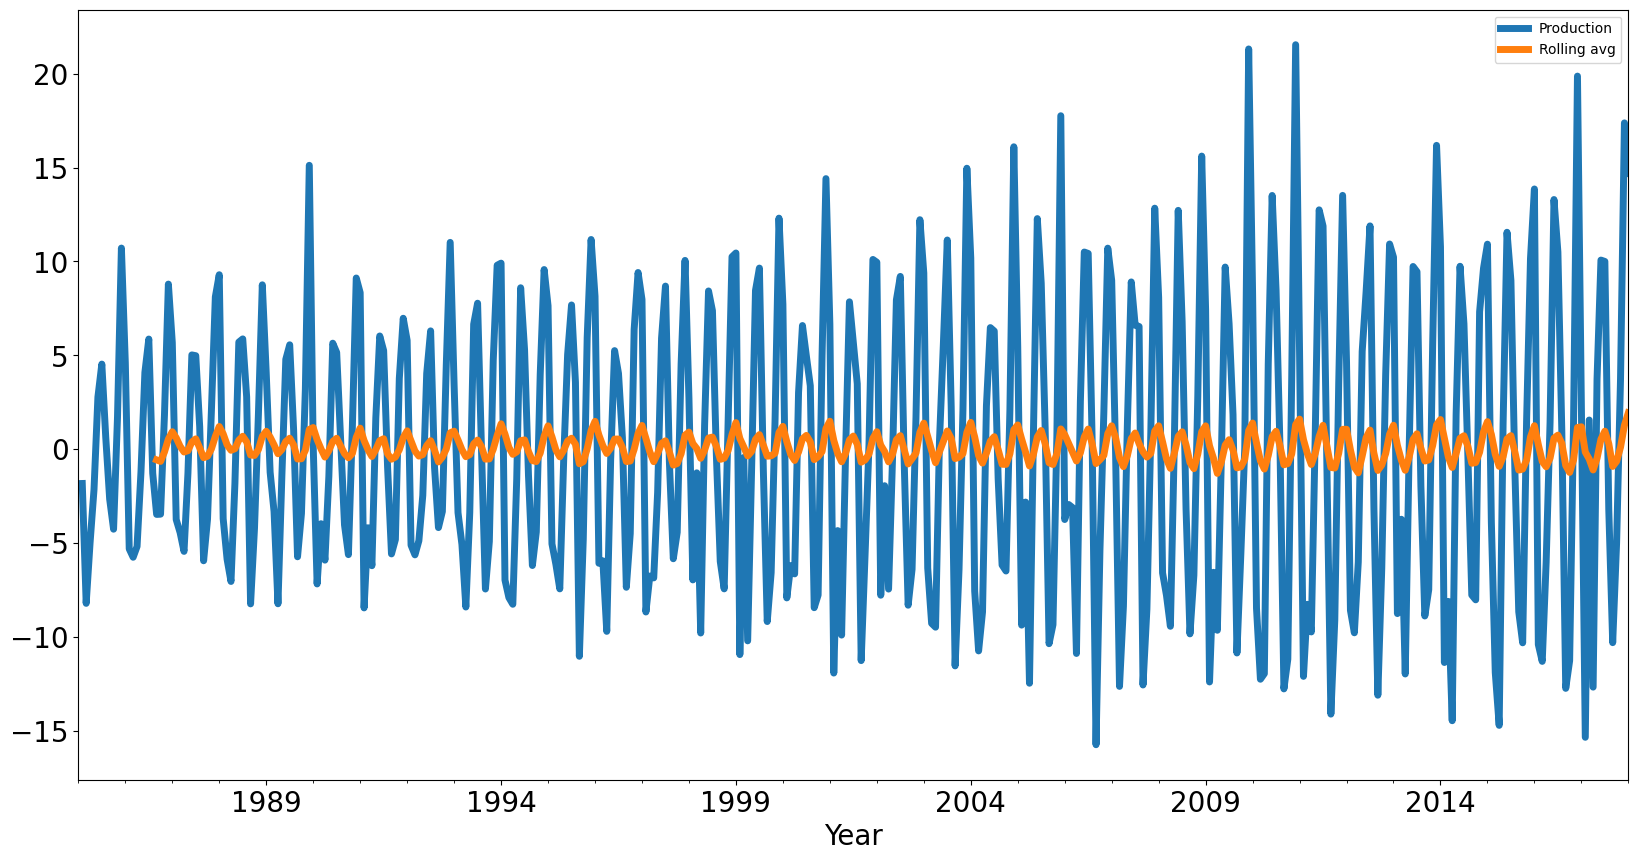

In [25]:
data.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
data.diff().corr()

# Autocorrelation
Measures how a variable's current value is related to its past values

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

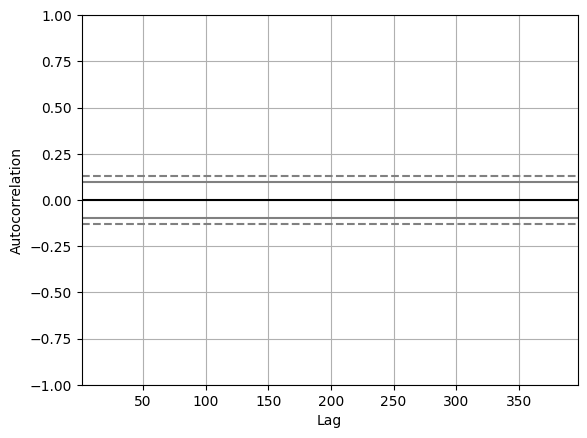

In [26]:
# Takeaway: plot is centered at 0, revealing no statistically significant autocorrelation between current and prior values of Production (GW)
pd.plotting.autocorrelation_plot(data)


# STL Decomposition

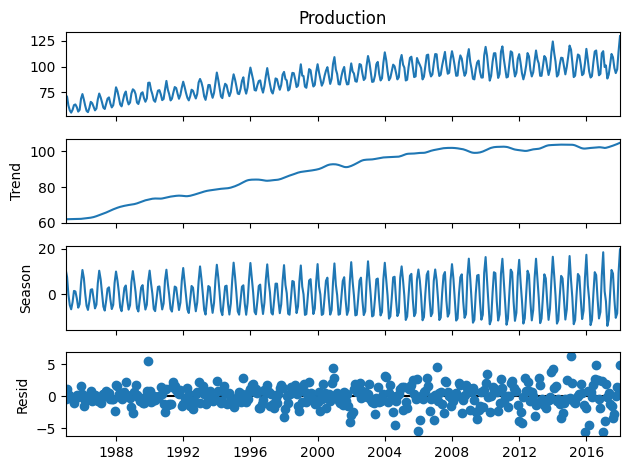

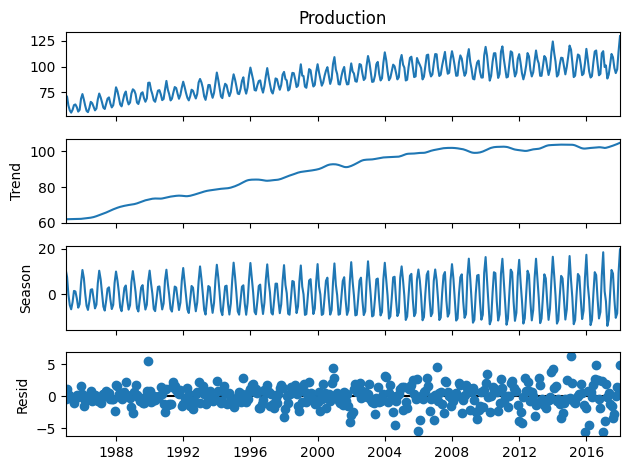

In [27]:
# Decomposition (breaks data down into Trend, Seasonality, Residual/noise)
from statsmodels.tsa.seasonal import STL

stl = STL(data['Production'], period=12)
res = stl.fit()
res.plot()



# Takeaways:
<ul>
<li>Trend: Production has a consistently upward yearly trend. Trend has slightly flattened since 2007, indicating that growth has started to slow after 2007
<li>Seasonality: Pattern is highly regular and stable in frequency (same cycle repeats), increasing in amplitude over time. Scales with level of production
<li>Residuals: centered around 0, random with no visible trend, slightly more spread in recent years -> indicates explainability and mid heteroskedasticity
</ul>
<b>Overall</b>: Production is driven by long-term growth and predictable seasonal cycles, with little unexplained structure left.


# More Analysis (signals/forecasting)

In [28]:
import scipy.io.wavfile
from IPython.display import Audio
from scipy.signal import resample


In [29]:
sampling_rate = 12
x = data['Production'].values
x = x - np.mean(x)

N = len(x)
fft = np.fft.fft(x)
freqs = np.fft.fftfreq(N, d=1/sampling_rate)


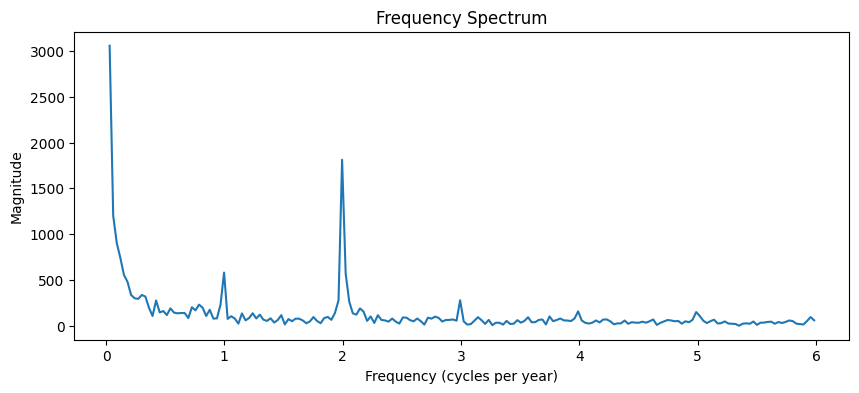

In [30]:
positive = freqs > 0

plt.figure(figsize=(10,4))
plt.plot(freqs[positive], np.abs(fft)[positive])
plt.xlabel("Frequency (cycles per year)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.show()

# Audio Playback
Listening to how the time series as an audio (same frequency).

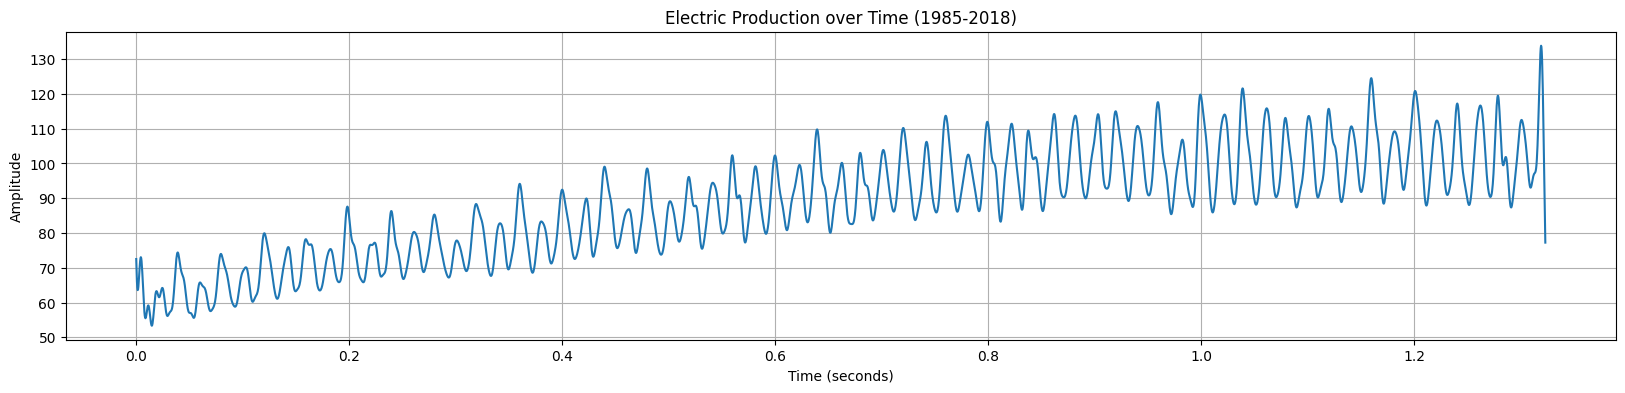

In [31]:
x_slow = resample(data['Production'], len(data['Production']) * 10)

plt.figure(figsize=(20,4))
n_points = len(x_slow)
n_sec, rate = 5, 3000
t = np.linspace(0, n_points / rate, n_points)

plt.plot(t, x_slow)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Electric Production over Time (1985-2018)')
plt.grid(True)
Audio(data=x_slow.astype(np.float32), rate=rate)
